<a href="https://colab.research.google.com/github/arirodriguez001/Laboratory-III/blob/main/figuras_ley_de_ohm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
!pip install nysg_tools
import nysg_tools as ny
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
!pip install git+https://github.com/SengerM/alfplotlib
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

import alfplotlib as apl

  Cloning https://github.com/SengerM/alfplotlib to /tmp/pip-req-build-av9xzkzq
  Running command git clone --filter=blob:none --quiet https://github.com/SengerM/alfplotlib /tmp/pip-req-build-av9xzkzq
  Resolved https://github.com/SengerM/alfplotlib to commit 1689146e4edcf5193c3f0b88e3aaddb901999f4d
  Preparing metadata (setup.py) ... done
  Created wheel for alfplotlib: filename=alfplotlib-0.0.0-py3-none-any.whl size=16006 sha256=e7aacac77502b8046c152f672798adcfa29d9b45d8a726b9fd901c0808d4d474
  Stored in directory: /tmp/pip-ephem-wheel-cache-dydhahag/wheels/08/14/46/a8272524fa15a4ed8f11f05749efa15460dcdf33e74a3582cb
Successfully built alfplotlib
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-paren

In [ ]:
resistencia_usada = 9900   #Resistencia que usamos en [Ohm]
v_in = np.array([3,4,5,6,7,8,9,10,11,12]) # Tensiones que usamos como entrada en [V]

r = np.full_like(v_in,resistencia_usada)

v_out = np.array([2.94,3.92,4.92,5.91,6.89,7.87,8.85,9.83,10.82,11.80]) # tensiones que medimos que "caen" en la resistencia [V]
i_out = np.array([298,398,499,600,700,798,898,998,1098,1198]) # corrientes que medimos en [uA]

# ERRORES:

#Aca hay que poner los errores de cada cosa que medimos:

v_out_err = v_out * 7/1000 + 0.03

i_out_err = i_out * 2/100 + 0.2

v_in_err = v_in * 5/1000 + 2

In [ ]:
# Ajuste lineal

def odr_line(a,x):
  return a[0]*x + a[1]

p0 = [resistencia_usada, 0]

p_1 = ny.fit_odr(v_out,i_out,odr_line,v_out_err,i_out_err,p0=p0)

La función es:
None
Resultados del ajuste:
Parámetro 0: 101.541 ± 0.05
Parámetro 1: -0.357 ± 0.294
Parametros de bondad:
ν: 7
χ²: 0.009
χ²/ν:0.001
Criterio 5%: (0.826, 13.174)


In [ ]:
plt.figure(figsize=(6,5))

plt.title("Comprobación Ley de Ohm",fontsize=20)  ## SM: Agrego titulo
plt.xlabel("Caída de voltaje de la resistencia $(V)$ ",fontsize=20) ## SM: cambie la unidad, fontsize ; AR: cambie el nombre
plt.ylabel("Corriente medida $(microA)$",fontsize=20)## SM: cambie la unidad

plt.errorbar(v_out,i_out,xerr=v_out_err,yerr=i_out_err,color="tab:red",capsize=3,elinewidth=.5,fmt=".")

plt.plot(ny.cont(v_out),odr_line(p_1["params"],ny.cont(v_out)),linewidth=1,c="tab:blue",label=f"Ajuste $V \cdot r, r ={np.round(p_1['params'][0],1)} \pm {np.round(p_1['err'][0],2)}$")## SM cambie color del ajuste

plt.legend(fontsize=15)
#plt.savefig("leyohm_1.svg",dpi=300)

La función es:
None
Resultados del ajuste:
Parámetro 0: 0.01 ± 0.0
Parámetro 1: 0.004 ± 0.003
Parametros de bondad:
ν: 7
χ²: 0.026
χ²/ν:0.004
Criterio 5%: (0.826, 13.174)


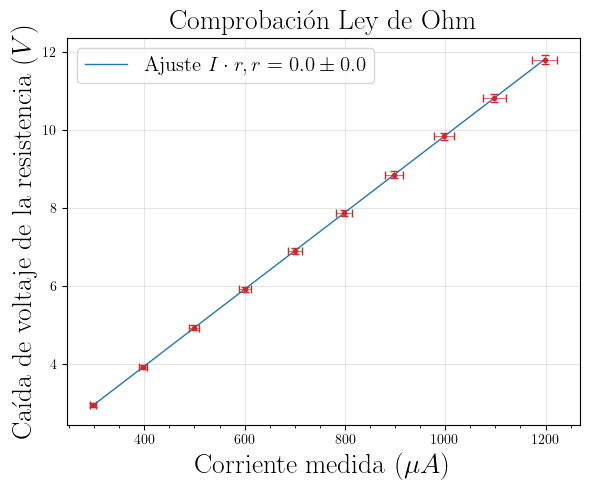

In [ ]:
# Doy vuelta el grafico

resistencia_usada = 9900   # Resistencia que usamos en [Ohm]
v_in = np.array([3,4,5,6,7,8,9,10,11,12])  # Tensiones que usamos como entrada en [V]
r = np.full_like(v_in, resistencia_usada)

v_out = np.array([2.94,3.92,4.92,5.91,6.89,7.87,8.85,9.83,10.82,11.80])  # Tensiones que medimos que "caen" en la resistencia [V]
i_out = np.array([298,398,499,600,700,798,898,998,1098,1198])  # Corrientes que medimos en [uA]

# Errores
v_out_err = v_out * 7/1000 + 0.03
i_out_err = i_out * 2/100 + 0.2
v_in_err = v_in * 5/1000 + 2

# Ajuste lineal
def odr_line(a, x):
    return a[0] * x + a[1]

p0 = [resistencia_usada, 0]

# Ajuste ODR con los ejes invertidos
p_1 = ny.fit_odr(i_out, v_out, odr_line, i_out_err, v_out_err, p0=p0)

# Crear gráfico con los ejes invertidos
plt.figure(figsize=(6,5))
plt.title("Comprobación Ley de Ohm", fontsize=20)
plt.xlabel("Corriente medida $(\mu A)$", fontsize=20)  # Invertido
plt.ylabel("Caída de voltaje de la resistencia $(V)$", fontsize=20)  # Invertido

# Gráfico con barras de error
plt.errorbar(i_out, v_out, xerr=i_out_err, yerr=v_out_err, color="tab:red", capsize=3, elinewidth=0.5, fmt=".")

# Línea de ajuste
plt.plot(ny.cont(i_out), odr_line(p_1["params"], ny.cont(i_out)), linewidth=1, c="tab:blue",
         label=f"Ajuste $I \cdot r, r = {np.round(p_1['params'][0], 1)} \pm {np.round(p_1['err'][0], 2)}$")

plt.legend(fontsize=15)
# plt.savefig("leyohm_1_invertido.svg", dpi=300)
plt.show()